# Lab 3

# Introduction to NumPy

In this lab, you'll be working through Chapter 2 to get an introduction to the numerical computing package for Python, NumPy. This notebook is made up of two sections.

- Section 1: Work through the code samples in Chapter 2
- Section 2: Exercises

# Section 1: Code Practice

In this section, you will be reading through the various chapter sections and typing out/running the code samples given in the sections. The purpose of this is for you to practice using Jupyter to run Python code as well as learn about the functionality available to you in both IPython and Jupyter.

##### Executing code in Jupyter

When typing and executing code in Jupyter, it is helpful to know the various keyboard shortcuts. You can find the full list of these by clicking **Help &rarr; Keyboard Shortcuts** in the menu. However, the two most useful keyboard shortcuts are:

- `Shift-Enter`: Execute the current cell and advance to the next cell. This will create one if none exists, but if a cell exists below your current cell, a new cell will **not** be created.
- `Alt-Enter`: Execute the current cell and **create** a new cell below.
- `Control-Enter`: Execute the current cell without advancing to the next cell

When writing your code, you will be using these two commands to make sure input/output (`In`/`Out`) is consistent with what is found in the chapter. If you create a cell by mistake, you can always go to **Edit &rarr; Delete Cells** to remove it.

#### Purpose of Section 1

Your purpose in this section is 

- **Type out** the code examples from the chapter (do not copy and paste)
- **Run** them
- **Check** to **make sure** you are getting the same results as what is contained in the chapter

---




## Computation on Arrays: Broadcasting

[Chapter/Section link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/02.05-Computation-on-arrays-broadcasting.ipynb)

### Introducing Broadcasting

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [3]:
a + 5

array([5, 6, 7])

### Rules of Broadcasting

#### Broadcasting example 1

In [4]:
M = np.ones((2, 3))
a = np.arange(3)

In [5]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

#### Broadcasting example 2

In [6]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [7]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Broadcasting example 3

In [8]:
M = np.ones((3, 2))
a = np.arange(3)

In [9]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [10]:
a[:, np.newaxis].shape

(3, 1)

In [11]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [12]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

### Broadcasting in Practice

#### Centering an array

In [13]:
X = np.random.random((10, 3))

In [14]:
Xmean = X.mean(0)
Xmean

array([0.44032988, 0.41362835, 0.45598415])

In [15]:
X_centered = X - Xmean

In [16]:
X_centered.mean(0)

array([ 3.33066907e-17, -5.55111512e-17,  0.00000000e+00])

#### Plotting a two-dimensional function

In [17]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

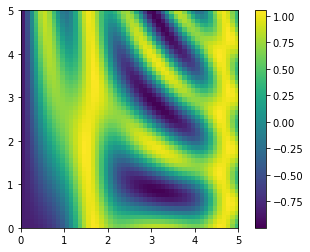

In [19]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

## Comparisons, Masks, and Boolean Logic

[Chapter/section link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/02.06-Boolean-Arrays-and-Masks.ipynb)

### Example: Counting Rainy Days

In [20]:
import pandas as pd
import numpy as np

In [21]:
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

Start the next cell at `inches = rainfall / 254.0`

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

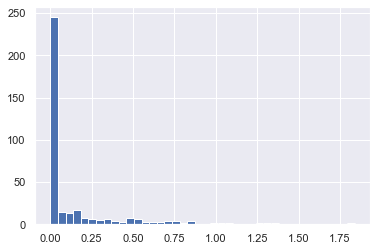

In [23]:
plt.hist(inches, 40);

### Comparison Operators as UFuncs

In [24]:
rainfall_inches = rainfall / 25.4

In [25]:
rainy_days_bool = rainfall_inches > 0.1

In [26]:
rainy_days = np.sum(rainy_days_bool)

In [27]:
tmax = array_from_file('Seattle2014.csv', 'TMAX')

NameError: name 'array_from_file' is not defined

In [28]:
hotdaysbool = tmax > 100

NameError: name 'tmax' is not defined

In [29]:
hotdays = np.sum(hotdaysbool)

NameError: name 'hotdaysbool' is not defined

In [30]:
print(f"Number of days with temperature above 100°F: {hotdays}")

NameError: name 'hotdays' is not defined

### Working with Boolean Arrays

In [31]:
tmaxf = tmax * 0.1 * 9/5 + 32
rainydaysbool = rainfall > 0
colddaysbool = tmaxf < 32
rainyandcolddaysbool = rainydaysbool & colddaysbool
rainyandcolddays = np.sum(rainyandcolddaysbool)

NameError: name 'tmax' is not defined

In [32]:
data = pd.read_csv('Seattle2014.csv')
dates = data['DATE'][rainyandcolddaysbool]
print(f"Number of days with rain and freezing temperatures: {rainyandcolddays}")
print("Dates with rain and freezing temperatures:")
print(dates.info())

NameError: name 'rainyandcolddaysbool' is not defined

#### Couting entries

In [33]:
tmaxf = tmax * 0.1 * 9/5 + 32

noprecipitationbool = rainfall == 0
warmdaysbool = tmaxf > 75

noprecipitationandwarmdaysbool = noprecipitationbool & warmdaysbool

NameError: name 'tmax' is not defined

In [34]:
countnoprecipitationandwarmdays = np.sum(noprecipitationandwarmdaysbool)

NameError: name 'noprecipitationandwarmdaysbool' is not defined

In [35]:
print(f"Number of days with no precipitation and temperatures above 75°F: {countnoprecipitationandwarmdays}")

NameError: name 'countnoprecipitationandwarmdays' is not defined

### Aside: Using the Keywords `and`/`or` Versus the Operators `&`/`|`

In [36]:
a = np.array([True, False, True, False])
b = np.array([True, True, False, False])

In [37]:
a & b

array([ True, False, False, False])

In [38]:
a | b

array([ True,  True,  True, False])

In [39]:
np.logical_and(a, b)

array([ True, False, False, False])

In [40]:
np.logical_or(a, b)

array([ True,  True,  True, False])

In [41]:
bin(42 & 59)

'0b101010'

In [42]:
bin(42 | 59)

'0b111011'

In [43]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [44]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [45]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [46]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Fancy Indexing

[Chapter/section link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/02.07-Fancy-Indexing.ipynb)

### Exploring Fancy Indexing

In [47]:
arr = np.array([10, 20, 30, 40, 50])

In [48]:
indices = np.array([1, 3, 4])

In [49]:
selectedelements = arr[indices]

In [50]:
print(arr)

[10 20 30 40 50]


In [51]:
print(indices)

[1 3 4]


In [52]:
print(selectedelements)

[20 40 50]


### Combined Indexing

In [53]:
arr = np.array([[10, 20, 30],
                [40, 50, 60],
                [70, 80, 90]])

In [54]:
row_indices = np.array([0, 2])
column_slice = slice(1, 3)

In [55]:
selected_elements = arr[row_indices, column_slice]

In [56]:
print(arr)

[[10 20 30]
 [40 50 60]
 [70 80 90]]


In [57]:
print(row_indices)

[0 2]


In [58]:
print(column_slice)

slice(1, 3, None)


In [59]:
print(selected_elements)

[[20 30]
 [80 90]]


### Example: Selecting Random Points

In [60]:
arr = np.array([1, 2, 3, 4, 50, 6, 70, 80, 9, 100000])

In [61]:
points = 5

In [62]:
random_indices = np.random.choice(arr.size, size=points, replace=False)

In [63]:
random_points = arr[random_indices]

In [64]:
print(random_indices)

[2 5 9 3 8]


In [65]:
print(random_points)

[     3      6 100000      4      9]


### Modifying Values with Fancy Indexing

In [66]:
indices = np.array([2, 5, 7])

In [67]:
new_values = np.array([300, 600, 800])

In [68]:
arr[indices] = new_values

In [69]:
arr

array([     1,      2,    300,      4,     50,    600,     70,    800,
            9, 100000])

### Example: Binning Data

In [70]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

In [71]:
bins = np.array([1, 3, 5, 7])

In [72]:
bins

array([1, 3, 5, 7])

In [73]:
for i, index in enumerate(bin_indices):
    print(f"point {data[i]} goes into bin {index}")

NameError: name 'bin_indices' is not defined

### Example: Selecting Random Points

In [74]:
rand = np.random.RandomState(42)
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

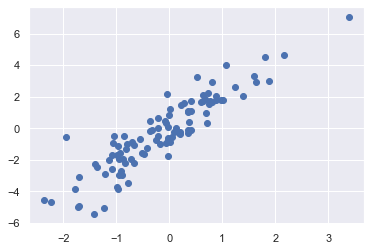

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [76]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([30, 56, 13, 41,  7, 20, 95,  3, 48, 14, 79, 12, 59, 26, 34, 89, 39,
       60, 84, 63])

In [77]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

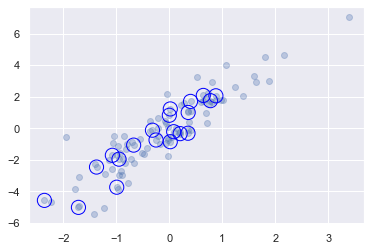

In [78]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', edgecolor='blue', s=200);

## Sorting Arrays

[Chapter/section link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/02.08-Sorting.ipynb)

In [79]:
def bubblesort(arr: np.array) -> np.array:
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

In [80]:
np.random.seed(0)
array = np.random.randint(0, 100000, size=10000)

In [81]:
arraylist = array.tolist()

In [82]:
arraylist

[68268,
 43567,
 42613,
 45891,
 21243,
 95939,
 97639,
 41993,
 86293,
 55026,
 80471,
 80966,
 48600,
 39512,
 52620,
 80186,
 17089,
 32230,
 18983,
 89688,
 82457,
 93005,
 6921,
 38804,
 67699,
 70608,
 37619,
 7877,
 83966,
 1871,
 73135,
 2496,
 47954,
 24675,
 31921,
 99059,
 797,
 49811,
 68755,
 80782,
 90535,
 81857,
 52489,
 84665,
 41504,
 49866,
 84212,
 96766,
 11723,
 43890,
 17591,
 58146,
 92288,
 59300,
 89141,
 71557,
 20006,
 3560,
 90868,
 61713,
 96591,
 45444,
 46522,
 86904,
 20737,
 28647,
 61353,
 92217,
 80163,
 12134,
 60535,
 47883,
 86107,
 63360,
 51811,
 9781,
 19340,
 27257,
 16298,
 12372,
 4420,
 82991,
 62079,
 79860,
 7012,
 9396,
 3918,
 9359,
 44259,
 23482,
 15127,
 37237,
 79701,
 8752,
 80041,
 71331,
 50624,
 89183,
 40133,
 93790,
 55153,
 62756,
 90928,
 81757,
 84355,
 99938,
 48682,
 66509,
 86384,
 75751,
 76693,
 24777,
 13824,
 2418,
 12843,
 78778,
 36223,
 61570,
 6521,
 88162,
 56894,
 74659,
 96990,
 14254,
 51939,
 89236,
 37073,


In [83]:
sorted_array_list = bubblesort(arraylist)
sorted_array = np.array(sorted_array_list)

In [84]:
sorted_array

array([   10,    13,    21, ..., 99965, 99975, 99980])

### Fast Sorting in NumPy: `np.sort` and `np.argsort`

In [85]:
np.sort(array)

array([   10,    13,    21, ..., 99965, 99975, 99980])

In [86]:
np.argsort(array)

array([3601, 5385, 8897, ..., 9718,  501, 5468])

#### Sorting along rows or columns

In [87]:
array = np.array([[9, 3, 1],
                     [4, 2, 7],
                     [8, 6, 5]])

In [88]:
print(array)

[[9 3 1]
 [4 2 7]
 [8 6 5]]


In [89]:
rows = np.sort(array, axis=1)

In [90]:
print(rows)

[[1 3 9]
 [2 4 7]
 [5 6 8]]


In [91]:
columns = np.sort(array, axis=0)

In [92]:
print(columns)

[[4 2 1]
 [8 3 5]
 [9 6 7]]


### Partial Sorts: Partitioning

In [93]:
array = np.random.randint(0, 100, size=20)
k = 3

In [94]:
partitionedarr = np.partition(array, k)

In [95]:
np.sort(partitionedarr[:k])

array([ 1,  9, 15])

In [96]:
smallest_elements = np.sort(partitionedarr[:k])

In [97]:
smallest_elements

array([ 1,  9, 15])

### Example: k-Nearest Neighbors

In [98]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [99]:
iris = load_iris()
X = iris.data  
y = iris.target  

In [100]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [101]:
k = 3

In [102]:
knn = KNeighborsClassifier(n_neighbors=k)

In [103]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [104]:
ypred = knn.predict(Xtest)

In [105]:
accuracy = accuracy_score(ytest, ypred)

In [106]:
print(f"Predicted labels for the test set: {ypred}")

Predicted labels for the test set: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [107]:
print(f"True labels for the test set: {ytest}")

True labels for the test set: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [108]:
print(f"Accuracy of the k-NN classifier with k={k}: {accuracy:.2f}")

Accuracy of the k-NN classifier with k=3: 0.98


## Structured Data: NumPy's Structured Arrays

[Chapter/section link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/02.09-Structured-Data-NumPy.ipynb)

In [109]:
dtype = [('name', 'U10'), ('age', 'i4'), ('height', 'f4')]

In [110]:
data = [('Alice', 30, 5.5), ('Bob', 25, 5.8), ('Charlie', 35, 5.9)]

In [111]:
structured_array = np.array(data, dtype=dtype)

In [112]:
structured_array

array([('Alice', 30, 5.5), ('Bob', 25, 5.8), ('Charlie', 35, 5.9)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('height', '<f4')])

In [113]:
"""https://numpy.org/doc/stable/user/basics.rec.html
was used for this part, they have example lists int heir documentation
that I used for this part"""

'https://numpy.org/doc/stable/user/basics.rec.html\nwas used for this part, they have example lists int heir documentation\nthat I used for this part'

### More Advanced Compound Types

In [114]:
nested_dtype = [('score', 'f4'), ('subject', 'U10')]
compound_dtype = [('name', 'U10'), 
                  ('age', 'i4'), 
                  ('grades', nested_dtype), 
                  ('hobbies', 'O')] 

In [115]:
compound_dtype = [('name', 'U10'), 
                  ('age', 'i4'), 
                  ('grades', nested_dtype), 
                  ('hobbies', 'O')] 

In [116]:
data = [
    ('Alice', 30, [('Math', 95.0), ('English', 88.5)], ['Reading', 'Swimming']),
    ('Bob', 25, [('Math', 78.0), ('English', 82.0)], ['Cycling', 'Hiking']),
    ('Charlie', 35, [('Math', 89.0), ('English', 92.0)], ['Photography', 'Traveling'])
]

In [117]:
advanced_structured_array = np.empty(len(data), dtype=compound_dtype)

In [118]:
print(advanced_structured_array)

[('', 0, (0., ''), None) ('', 0, (0., ''), None) ('', 0, (0., ''), None)]


### RecordArrays: Structured Arrays with a Twist

In [119]:
grades_dtype = [('subject', 'U10'), ('score', 'f4')]

In [120]:
student_dtype = [('name', 'U10'), 
                 ('age', 'i4'), 
                 ('grades', grades_dtype), 
                 ('enrolled', 'b')]

In [121]:
data = [
    ('Alice', 30, [('Math', 95.0), ('English', 88.5)], True),
    ('Bob', 25, [('Math', 78.0), ('English', 82.0)], False),
    ('Charlie', 35, [('Math', 89.0), ('English', 92.0)], True)
]

In [122]:
structured_array = np.empty(3, dtype=student_dtype)


In [123]:
structured_array

array([('', 0, ('', 0.), 0), ('', 0, ('', 0.), 0), ('', 0, ('', 0.), 0)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('grades', [('subject', '<U10'), ('score', '<f4')]), ('enrolled', 'i1')])

In [124]:
"""https://numpy.org/doc/stable/user/basics.rec.html
was used for this part, they have example lists int heir documentation
that I used for this part"""

'https://numpy.org/doc/stable/user/basics.rec.html\nwas used for this part, they have example lists int heir documentation\nthat I used for this part'

---

# Section 2: Exercises

In this section, you will be provided a few exercises to demonstrate your understanding of the chapter contents. Each exercise will have a Markdown section describing the problem, and you will provide cells below the description with code, comments and visual demonstrations of your solution.

---

### Problem 1

Make sure you have the `array_from_url` function defined:

```python
def array_from_url(url, column):
    import pandas as pd
    import numpy as np
    data = pd.read_csv(url)
    return np.array(data[column])
```

Using the `array_from_url` function, load the following two data sets into memory using the variable names provided:

- variable: `areas`
    - URL: `"https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv"`
    - column: `"area (sq. mi)"`
- variable: `populations`
    - URL: `"https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-population.csv"`
    - column: `"population"`

Compute a new variable: `pop_density` containing the population density of each of the states (plus D.C. and Puerto Rico). Population density is defined as the population divided by the area.

Use this NumPy array to answer the following questions.

- Which state has the highest population density and what is it?
- Which territory has the highest population density and what is it?
- What is the mean population density of just the United States in 2012?
- What is the mean population density of the United States and territories in 2012?

In [125]:
def array_from_url(url, column):
    import pandas as pd
    import numpy as np
    data = pd.read_csv(url)
    return np.array(data[column])

In [126]:
url = "https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv"
df_area = pd.read_csv(url)

In [127]:
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'Puerto Rico': 'PR'
}

In [128]:
df_area['state'] = df_area['state'].map(state_abbreviations)

In [129]:
print(df_area)

   state  area (sq. mi)
0     AL          52423
1     AK         656425
2     AZ         114006
3     AR          53182
4     CA         163707
5     CO         104100
6     CT           5544
7     DE           1954
8     FL          65758
9     GA          59441
10    HI          10932
11    ID          83574
12    IL          57918
13    IN          36420
14    IA          56276
15    KS          82282
16    KY          40411
17    LA          51843
18    ME          35387
19    MD          12407
20    MA          10555
21    MI          96810
22    MN          86943
23    MS          48434
24    MO          69709
25    MT         147046
26    NE          77358
27    NV         110567
28    NH           9351
29    NJ           8722
30    NM         121593
31    NY          54475
32    NC          53821
33    ND          70704
34    OH          44828
35    OK          69903
36    OR          98386
37    PA          46058
38    RI           1545
39    SC          32007
40    SD        

In [130]:
url = "https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-population.csv"
df_population = pd.read_csv(url)

In [131]:
df_population = df[(df['ages'] == 'total') & (df['year'] == 2012)]

NameError: name 'df' is not defined

In [132]:
print(df_population)

     state/region     ages  year   population
0              AL  under18  2012    1117489.0
1              AL    total  2012    4817528.0
2              AL  under18  2010    1130966.0
3              AL    total  2010    4785570.0
4              AL  under18  2011    1125763.0
...           ...      ...   ...          ...
2539          USA    total  2010  309326295.0
2540          USA  under18  2011   73902222.0
2541          USA    total  2011  311582564.0
2542          USA  under18  2012   73708179.0
2543          USA    total  2012  313873685.0

[2544 rows x 4 columns]


In [133]:
df_area.columns = ['state', 'area_sq_mi']
df_population_2012 = df_population[(df_population['ages'] == 'total') & (df_population['year'] == 2012)]
df_merged = pd.merge(df_population_2012, df_area, left_on='state/region', right_on='state')
df_merged['population_density'] = df_merged['population'] / df_merged['area_sq_mi']

In [134]:
state_max_density = df_merged[df_merged['state/region'] != 'PR']
max_density_state = state_max_density.loc[state_max_density['population_density'].idxmax()]

In [135]:
territory_max_density = df_merged[df_merged['state/region'] == 'PR']
max_density_territory = territory_max_density.loc[territory_max_density['population_density'].idxmax()]

In [136]:
pop_density = df_merged[df_merged['state/region'] != 'PR']['population_density'].mean()

In [137]:
total_population_density = df_merged['population_density'].mean()

In [138]:
print(f"highest population density: {max_density_state['state/region']} with density {max_density_state['population_density']:.2f} people per square mile")

highest population density: DC with density 9315.10 people per square mile


In [139]:
print(f"highest population density: {max_density_territory['state/region']} with density {max_density_territory['population_density']:.2f} people per square mile")

highest population density: PR with density 1038.85 people per square mile


In [140]:
print(f"mean population density in 2012: {pop_density:.2f} people per square mile")

mean population density in 2012: 347.54 people per square mile


In [141]:
print(f"Mean population density and territories in 2012: {total_population_density:.2f} people per square mile")

Mean population density and territories in 2012: 360.84 people per square mile


---

### Problem 2

Using the `array_from_url` function, load the following two data sets into memory using the variable names provided:

- variable: `titanid`
    - URL: `"https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"`
    - column: `"age"`



Answer the following questions:

- What are the minimum, maximum, and mean ages of the following types of passengers on the Titanic?
    - All passengers
    - Survivors 
    - Those that died
- What are the percentage of male passengers that died?
- What are the percentage of female passengers that died?


In [142]:
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
ages = array_from_url(titanic_url, "Age")
data = pd.read_csv(titanic_url)

In [143]:
def age_stats(df, survived=None):
    if survived is not None:
        df = df[df['Survived'] == survived]
    ages = df['Age'].dropna()
    return {
        'min': ages.min(),
        'max': ages.max(),
        'mean': ages.mean()
    }

In [144]:
all_stats = age_stats(data)

In [145]:
survivors_stats = age_stats(data, survived=1)

In [146]:
died_stats = age_stats(data, survived=0)

In [147]:
total_passengers = len(data)
died_passengers = data[data['Survived'] == 0]
male_died_percentage = len(died_passengers[died_passengers['Sex'] == 'male']) / len(data[data['Sex'] == 'male']) * 100
female_died_percentage = len(died_passengers[died_passengers['Sex'] == 'female']) / len(data[data['Sex'] == 'female']) * 100

In [148]:
print(f"Age statistics for all passengers: {all_stats}")

Age statistics for all passengers: {'min': 0.42, 'max': 80.0, 'mean': 29.69911764705882}


In [149]:
print(f"Age statistics for survivors: {survivors_stats}")

Age statistics for survivors: {'min': 0.42, 'max': 80.0, 'mean': 28.343689655172415}


In [150]:
print(f"Age statistics for those that died: {died_stats}")

Age statistics for those that died: {'min': 1.0, 'max': 74.0, 'mean': 30.62617924528302}


In [151]:
print(f"Percentage of male passengers that died: {male_died_percentage:.2f}%")

Percentage of male passengers that died: 81.11%


In [152]:
print(f"Percentage of female passengers that died: {female_died_percentage:.2f}%")

Percentage of female passengers that died: 25.80%


---

### Problem 3

Define the following function:

```python
def titanic_structured():
    import pandas as pd, numpy as np
    data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
    cols = ['survived', 'pclass', 'sex', 'age', 'fare']
    sarray = np.zeros(len(data), dtype={'names':cols,'formats':('i4','i4','U10','f8','f8')})
    sarray['survived'] = data.Survived
    sarray['pclass'] = data.Pclass
    sarray['sex'] = data.Sex
    sarray['age'] = data.Age
    sarray['fare'] = data.Fare
    return sarray
```

Assign the output of this function to a new variable `titanic_new`, and answer the following questions:

- What is the average age of men that survived?
- What is the average age of women that survived?
- What is the [mode](https://www.mathsisfun.com/definitions/mode.html) of the class of survivors?
- What is the mode of the class of those that died?
   

In [153]:
from scipy import stats

In [154]:
def titanic_structured():
    import pandas as pd
    data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
    cols = ['survived', 'pclass', 'sex', 'age', 'fare']
    sarray = np.zeros(len(data), dtype={'names':cols,'formats':('i4','i4','U10','f8','f8')})
    sarray['survived'] = data.Survived
    sarray['pclass'] = data.Pclass
    sarray['sex'] = data.Sex
    sarray['age'] = data.Age
    sarray['fare'] = data.Fare
    return sarray

In [155]:
titanic_new = titanic_structured()

In [156]:
survivors = titanic_new[titanic_new['survived'] == 1]

In [157]:
died = titanic_new[titanic_new['survived'] == 0]

In [158]:
menage = np.mean(survivors[survivors['sex'] == 'male']['age'])

In [159]:
womenage = np.mean(survivors[survivors['sex'] == 'female']['age'])

In [160]:
modesurvivors = stats.mode(survivors['pclass'])[0][0]

In [161]:
modedied = stats.mode(died['pclass'])[0][0]

In [162]:
print(f"Average age of men that survived: {menage}")

Average age of men that survived: nan


In [163]:
print(f"Average age of women that survived: {womenage}")

Average age of women that survived: nan


In [164]:
print(f"Mode of the class of survivors: {modesurvivors}")

Mode of the class of survivors: 1


In [165]:
print(f"Mode of the class of those that died: {modedied}")

Mode of the class of those that died: 3
